# Secondary Mushroom Dataset
http://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

import os

model_save_path = os.path.join(os.environ['HOME'], 'autogluon_models', 'secondary_mushroom_data')

### Data ingestion

In [2]:
secondary_data = pd.read_csv('../../data/secondary_data.csv', sep=';')
print(secondary_data.shape)
secondary_data.head()

(61069, 21)


,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
secondary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  object 
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          36006 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem_width            61069 non-null  float64
 11  stem_root             9531 non-null   object 
 12  stem_surface          22945 non-null  object 
 13  stem_color            61069 non-null  object 
 14  veil_type             3177 non-null   object 
 15  veil_color         

p    33888
e    27181
Name: class, dtype: int64


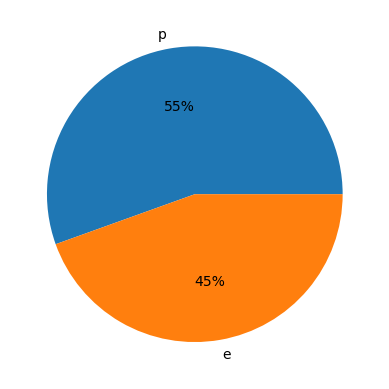

In [4]:
share = secondary_data['class'].value_counts()
print(share)
plt.pie(share, labels = share.index, autopct='%.0f%%')
plt.show()

### Data analysis

In [5]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.18, random_state=0)
train_df = None
test_df = None
for train_idx, test_idx in strat_split.split(secondary_data, secondary_data['class']):
    train_df = secondary_data.loc[train_idx]
    test_df = secondary_data.loc[test_idx]
    
print(train_df.shape)
print(test_df.shape)

(50076, 21)
(10993, 21)


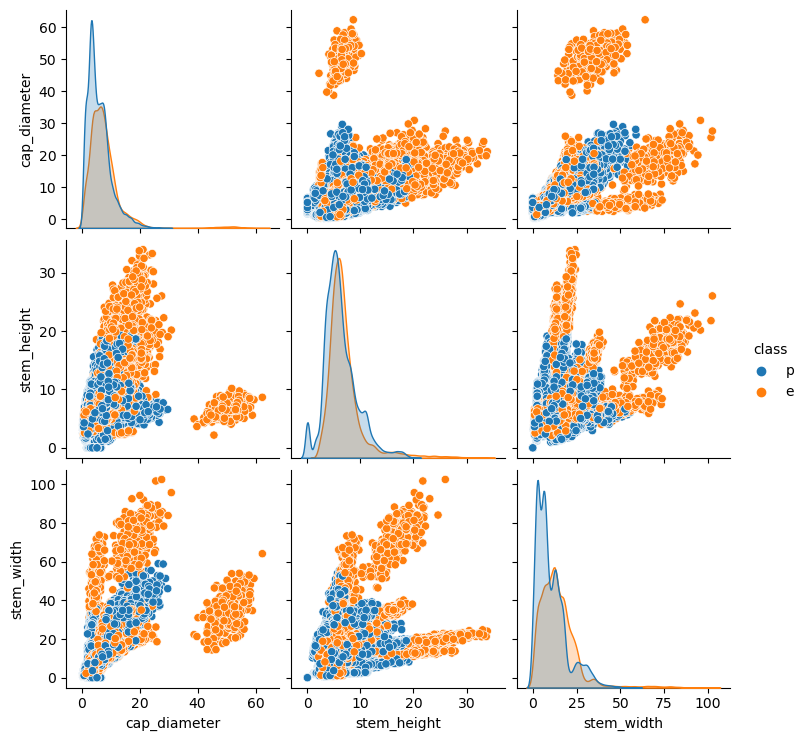

In [6]:
sns.pairplot(train_df, hue='class')

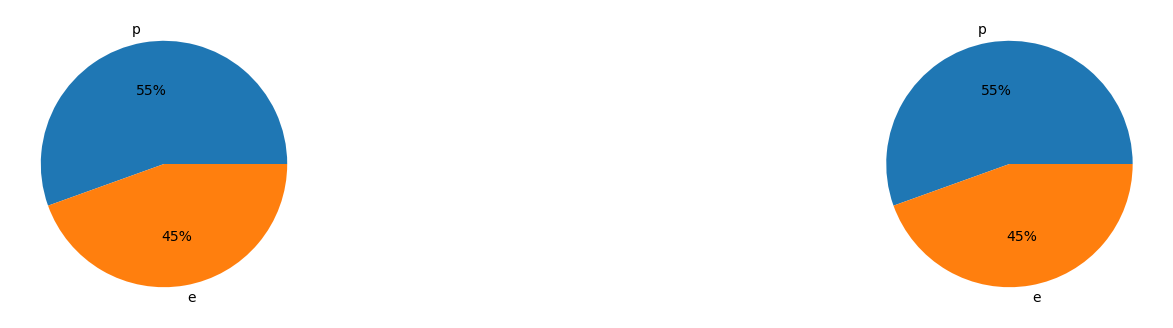

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
train_share = train_df['class'].value_counts()
test_share = test_df['class'].value_counts()

ax[0].pie(train_share, labels = train_share.index, autopct='%.0f%%')
ax[1].pie(test_share, labels = test_share.index, autopct='%.0f%%')
plt.show()

### Model training with Autogluon

In [8]:
label='class'
training_dataset = TabularDataset.from_records(train_df)

In [9]:
predictor = TabularPredictor(label=label, path=model_save_path)
predictor.fit(training_dataset);

Beginning AutoGluon training ...
AutoGluon will save models to "/Users/Michael_Enudi/autogluon_models/secondary_mushroom_data/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 21:00:17 PST 2023; root:xnu-8796.101.5~3/RELEASE_X86_64
Train Data Rows:    50076
Train Data Columns: 20
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['p', 'e']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = p, class 0 = e
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (p) vs negative (e) class.
	To explicitly set th

In [10]:
predictor.leaderboard();

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost     1.0000       0.013491   4.399160                0.013491           4.399160            1       True          7
1            LightGBMXT     1.0000       0.013835   1.939540                0.013835           1.939540            1       True          3
2              LightGBM     1.0000       0.014412   0.451714                0.014412           0.451714            1       True          4
3               XGBoost     1.0000       0.021123   3.344848                0.021123           3.344848            1       True         11
4        NeuralNetTorch     1.0000       0.025383  25.394116                0.025383          25.394116            1       True         12
5       NeuralNetFastAI     1.0000       0.048367  40.784585                0.048367          40.784585            1       True         10
6      RandomForestEntr    

Computing feature importance via permutation shuffling for 20 features using 5000 rows with 5 shuffle sets...
	15.73s	= Expected runtime (3.15s per shuffle set)
	5.58s	= Actual runtime (Completed 5 of 5 shuffle sets)


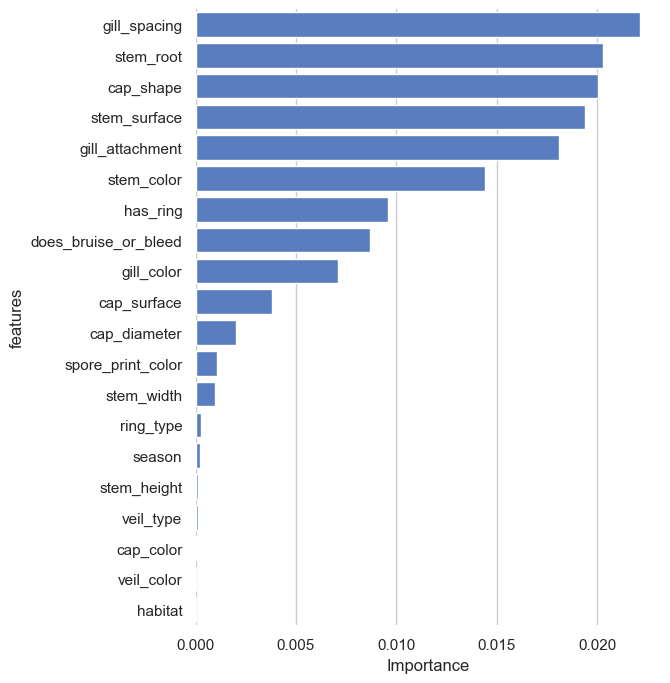

In [11]:
feature_imp = predictor.feature_importance(training_dataset)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=feature_imp.index, x=feature_imp.importance, label="Importance", color="b", ax=ax)

ax.set(xlim=(0, feature_imp.importance.max()+0.001), ylabel="features", xlabel="Importance")
sns.despine(left=True, bottom=True)

## testing

In [12]:
testing_dataset = TabularDataset.from_records(test_df.drop(columns=['class'], axis=1))
y_true = test_df['class']
y_pred = predictor.predict(testing_dataset)

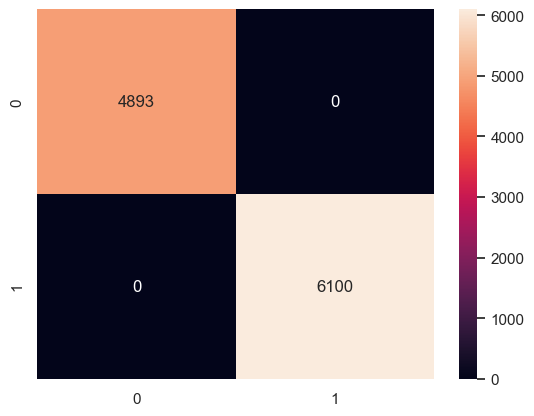

In [14]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=''); ## looks too good